In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cmath
import re
plt.style.use('seaborn-v0_8-paper')

In [2]:
def separa_dados_motor(df):
    Ld = []
    Lq = []
    lambda_f = []
    
    for i, r in df.iterrows():
        valor_arr = str(r[0].split(' '))
        valor_arr = re.sub(r'[\[\]]', '', valor_arr)
        valor_arr = valor_arr.split(',')
        i = 0
        for elem in valor_arr:
            try:
                valor = float(elem.replace("'",''))
                if i == 0:
                    Ld.append(valor)
                    i += 1
                elif i == 1:
                    Lq.append(valor)
                    i += 1
                elif i == 2:
                    lambda_f.append(valor)
                else:
                    print('Error')
            except:
                pass
    
    return Ld, Lq, lambda_f

In [3]:
def plot_histogram(title, values,gabarito, bins, save_plot=False, filename=None):
    error = (np.sqrt(np.power(np.array(values) - gabarito, 2)) / gabarito) * 100
    menor_error_idx = np.argmin(error)
    menor_error = np.min(error)
    print(f"A seed de menor erro obtido é: {menor_error_idx} \n e o valor é: {menor_error}")
    plt.hist(error, bins=bins)
    plt.xlabel('Error (%)')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    
    if save_plot:
        if not filename:
            filename = "histogram_plot.svg"
        plt.savefig(filename,dpi=200)
        print(f"Plot saved as {filename}")

0           0.000000
1          -0.046356
2          -0.092712
3          -0.139067
4          -0.185423
             ...    
599996    600.076118
599997    600.082381
599998    600.090416
599999    600.097759
600000    600.104410
Name: Data_4, Length: 600001, dtype: float64


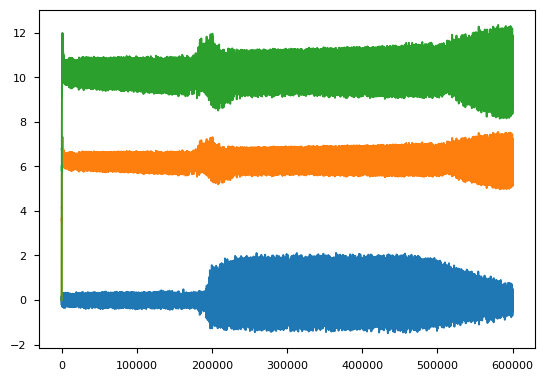

In [4]:
db = pd.read_csv('saida_motor.csv')

#extracting velocity in rpm from db
rpm = db['Data_4']

print(rpm)

#extracting Id and Iq from db
i_d = db['Data_1']
i_q = db['Data_2']

#extracting estimated torque
T_ref = db['Data_5']
plt.plot(i_d)
plt.plot(i_q)
plt.plot(T_ref)

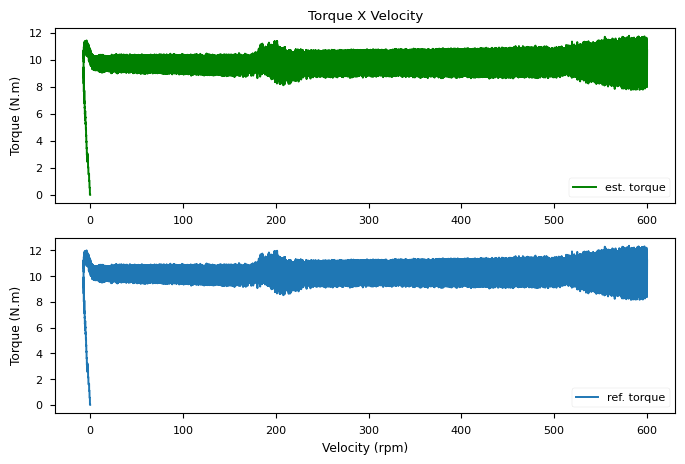

In [5]:
#estimated torque equation
def est_torque(Ld, Lq, yf, rpm, i_d, i_q, T_ref):

    #creating estimated torque equation
    T = (3/4) * 12 * i_q * (Ld * i_d + yf - Lq * i_d)

    #saving db on a csv file
    path = 'torque_est.csv'
    df = pd.DataFrame({
        'rpm': rpm,
        'T_est': T,
    })
    
    df.to_csv(path, index=False)
    
    #plotting the curve
    plt.figure(figsize=(8, 5))
    plt.subplot(2,1,1)
    plt.title('Torque X Velocity')
    plt.plot(rpm ,T, label='est. torque', color ='green')
    plt.ylabel('Torque (N.m)')
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(rpm ,T_ref, label='ref. torque')
    plt.xlabel('Velocity (rpm)')
    plt.ylabel('Torque (N.m)')
    plt.legend()
    plt.savefig('torque.pdf', dpi = 200)
    
    return df

T_est = est_torque(0.00644788, 0.00666948, 0.17319, rpm, i_d, i_q, T_ref)

In [6]:
T_est

,rpm,T_est
0,0.000000,0.000000e+00
1,-0.046356,-5.003277e-35
2,-0.092712,9.700607e-06
3,-0.139067,2.908698e-05
4,-0.185423,5.814430e-05
...,...,...
599996,600.076118,1.050306e+01
599997,600.082381,1.086767e+01
599998,600.090416,1.123440e+01
599999,600.097759,1.109050e+01


In [7]:
T_ref

0        -4.184288e-35
1         1.018847e-05
2         3.054981e-05
3         6.106847e-05
4         1.017289e-04
              ...     
599996    1.141390e+01
599997    1.179620e+01
599998    1.164686e+01
599999    1.149758e+01
600000    1.134837e+01
Name: Data_5, Length: 600001, dtype: float64

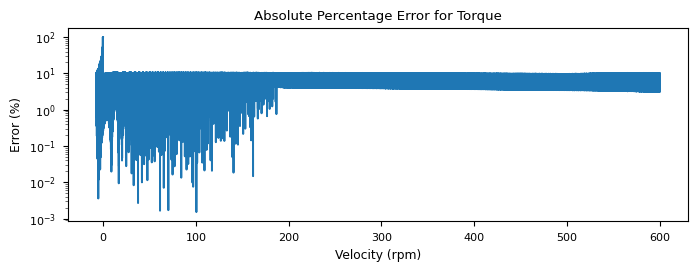

In [8]:
error = (np.abs((T_ref - T_est['T_est'])/T_ref))*100

plt.figure(figsize=(8, 2.5))
plt.plot(rpm, error, label='error')
plt.title('Absolute Percentage Error for Torque')
plt.xlabel('Velocity (rpm)')
plt.ylabel('Error (%)')
plt.yscale('log')  # Setting y-axis to log scale
plt.savefig('error.pdf', dpi=200)

In [9]:
dado_SA_dual = pd.read_csv('T_est.txt',header=None)
dado_SA_dual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30 non-null     object 
 1   1       30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [10]:
dado_SA = pd.read_csv('T_est_SA.txt',header=None)
dado_SA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       29 non-null     object 
 1   1       29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


In [11]:
Ld, Lq, lambda_f = separa_dados_motor(dado_SA)
min_limit_ld = np.min(Ld)
max_limit_ld = np.max(Ld)
min_limit_lq = np.min(Lq)
max_limit_lq = np.max(Lq)
min_limit_lambda_f = np.min(lambda_f)
max_limit_lambda_f = np.max(lambda_f)
gabarito_Ld = 8.5e-3
gabarito_Lq = 8.5e-3
gabarito_lambda_f = 0.1819

In [12]:
Ld_dual, Lq_dual, lambda_f_dual = separa_dados_motor(dado_SA_dual)

A seed de menor erro obtido é: 23 
 e o valor é: 4.025294117647072
Plot saved as ld_DSA.pdf


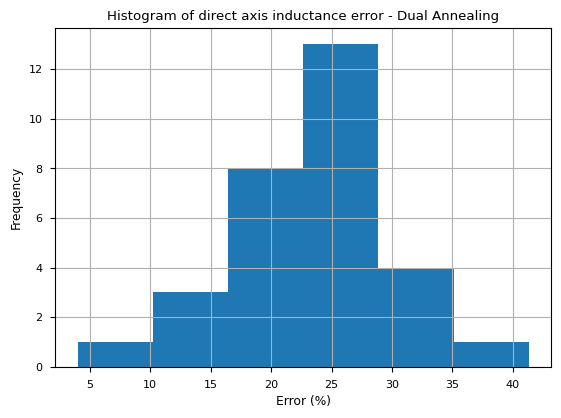

In [13]:
titulo_ld_dual = 'Histogram of direct axis inductance error - Dual Annealing'
bins_ld_dual=6
plot_histogram(titulo_ld_dual,Ld_dual,gabarito_Ld,bins_ld_dual, save_plot=True, filename='ld_DSA.pdf')

A seed de menor erro obtido é: 28 
 e o valor é: 2.379411764705874
Plot saved as ld_SA.pdf


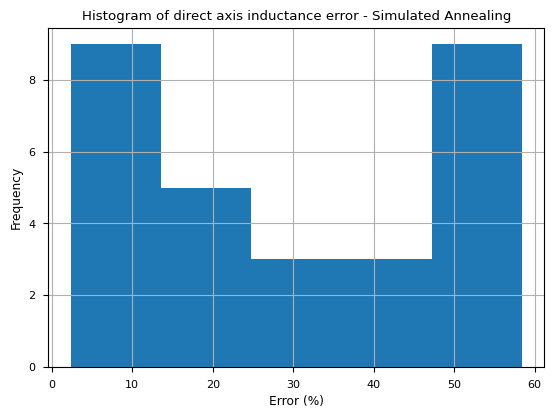

In [14]:
titulo_ld = 'Histogram of direct axis inductance error - Simulated Annealing'
bins_ld=5
plot_histogram(titulo_ld,Ld,gabarito_Ld,bins_ld, save_plot=True, filename='ld_SA.pdf')

A seed de menor erro obtido é: 23 
 e o valor é: 1.418235294117653
Plot saved as lq_DSA.pdf


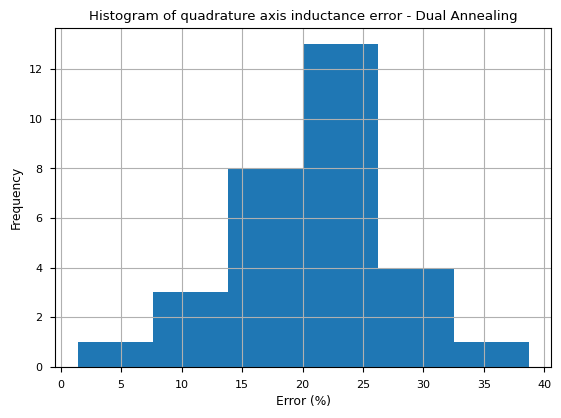

In [15]:
titulo_lq_dual = 'Histogram of quadrature axis inductance error - Dual Annealing'
bins_lq_dual=6
plot_histogram(titulo_lq_dual,Lq_dual,gabarito_Lq,bins_lq_dual, save_plot=True, filename='lq_DSA.pdf')

A seed de menor erro obtido é: 13 
 e o valor é: 2.527529411764716
Plot saved as lq_SA.pdf


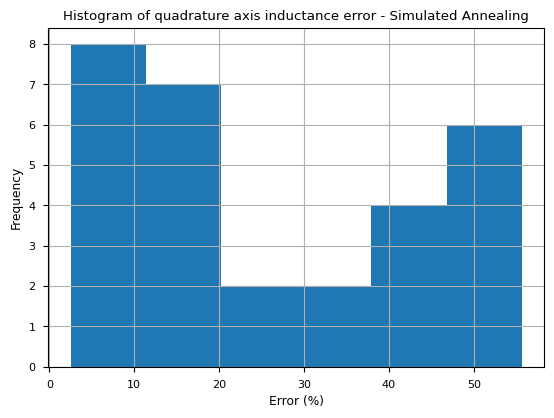

In [16]:
titulo_lq = 'Histogram of quadrature axis inductance error - Simulated Annealing'
bins_lq=6
plot_histogram(titulo_lq,Lq,gabarito_Lq,bins_lq, save_plot=True, filename='lq_SA.pdf')

A seed de menor erro obtido é: 10 
 e o valor é: 4.790626717976912
Plot saved as lambdaf_SA.pdf


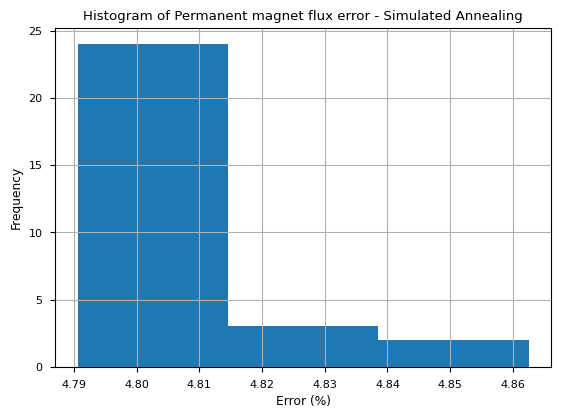

In [17]:
titulo_lambda_f ='Histogram of Permanent magnet flux error - Simulated Annealing'
bins_lambda_f=3
plot_histogram(titulo_lambda_f,lambda_f,gabarito_lambda_f,bins_lambda_f, save_plot=True, filename='lambdaf_SA.pdf')

A seed de menor erro obtido é: 0 
 e o valor é: 4.788345244639909
Plot saved as lambdaf_DSA.pdf


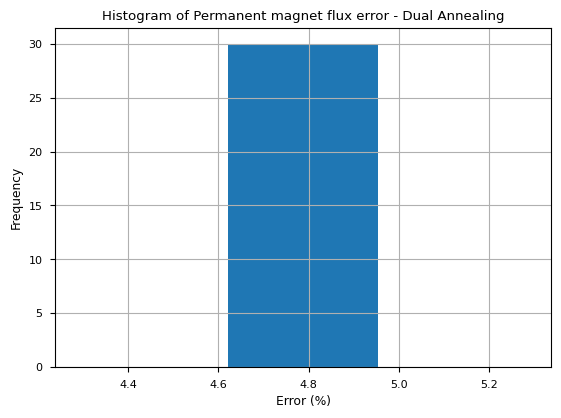

In [18]:
titulo_lambda_f_dual ='Histogram of Permanent magnet flux error - Dual Annealing'
bins_lambda_f_dual=3
plot_histogram(titulo_lambda_f_dual,lambda_f_dual,gabarito_lambda_f,bins_lambda_f_dual, save_plot=True, filename='lambdaf_DSA.pdf')

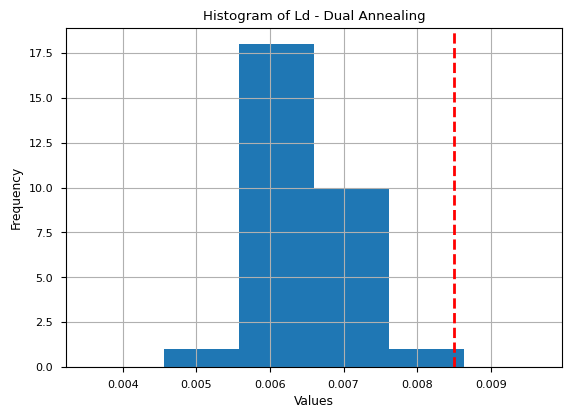

<Figure size 640x440 with 0 Axes>

In [19]:
plt.hist(Ld_dual, bins=6, range=(min_limit_ld, max_limit_ld))
plt.axvline(x=gabarito_Ld, color='r', linestyle='--', linewidth=2)  # Adjust color, linestyle, and linewidth as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Ld - Dual Annealing')
plt.grid(True)
plt.savefig('ld_hist_DSA.pdf',dpi=200)

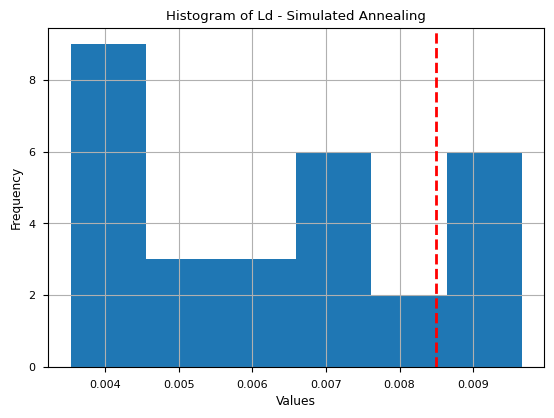

<Figure size 640x440 with 0 Axes>

In [20]:
plt.hist(Ld, bins=6, range=(min_limit_ld, max_limit_ld))  # Adjust the number of bins as needed
plt.axvline(x=gabarito_Ld, color='r', linestyle='--', linewidth=2)  # Adjust color, linestyle, and linewidth as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Ld - Simulated Annealing')
plt.grid(True)
plt.savefig('ld_hist_SA.pdf',dpi=200)

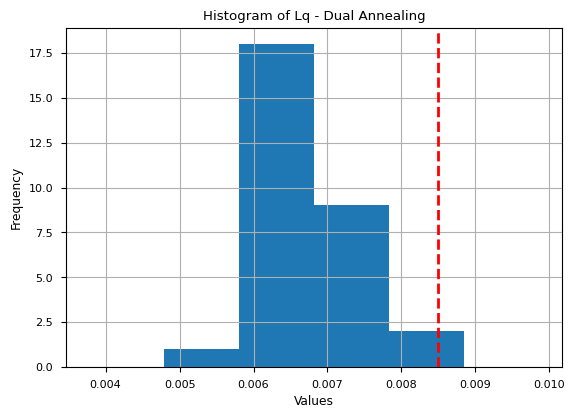

<Figure size 640x440 with 0 Axes>

In [21]:
plt.hist(Lq_dual, bins=6, range=(min_limit_lq, max_limit_lq))
plt.axvline(x=gabarito_Lq, color='r', linestyle='--', linewidth=2)  # Adjust color, linestyle, and linewidth as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Lq - Dual Annealing')
plt.grid(True)
plt.savefig('lq_hist_DSA.pdf',dpi=200)

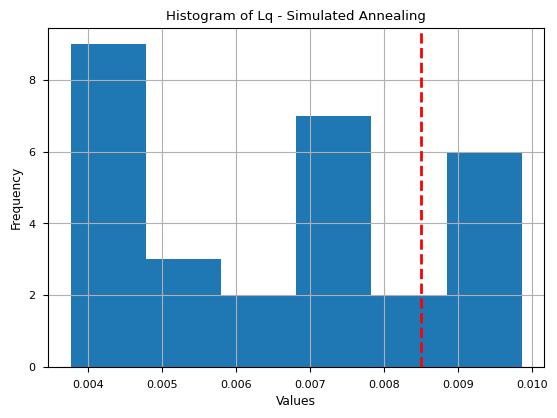

<Figure size 640x440 with 0 Axes>

In [22]:
plt.hist(Lq, bins=6, range=(min_limit_lq, max_limit_lq))
plt.axvline(x=gabarito_Lq, color='r', linestyle='--', linewidth=2)  # Adjust color, linestyle, and linewidth as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Lq - Simulated Annealing')
plt.grid(True)
plt.savefig('lq_hist_SA.pdf',dpi=200)

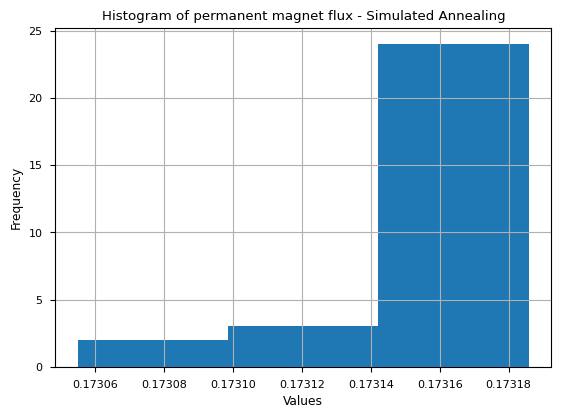

<Figure size 640x440 with 0 Axes>

In [23]:
plt.hist(lambda_f, bins=3)
#plt.axvline(x=gabarito_lambda_f, color='r', linestyle='--', linewidth=2)  # Adjust color, linestyle, and linewidth as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of permanent magnet flux - Simulated Annealing')
plt.grid(True)
plt.savefig('lambdaf_SA.pdf',dpi=200)

In [24]:
np.mean(lambda_f_dual)

0.17319

In [25]:
np.std(lambda_f_dual)

0.0

In [26]:
np.mean(lambda_f)

0.17315677448275862

In [27]:
np.std(lambda_f)

2.9746187189598013e-05

In [28]:
np.mean(Lq_dual)

0.006803803

In [29]:
np.std(Lq_dual)

0.0005900572472178723

In [30]:
np.mean(Ld_dual)

0.006582205666666668

In [31]:
np.std(Ld_dual)

0.0005900566428441895

In [32]:
np.mean(Ld)

0.006287692413793104

In [33]:
np.std(Ld)

0.0019268776228318278

In [34]:
np.mean(Ld_dual)

0.006582205666666668

In [35]:
np.std(Ld_dual)

0.0005900566428441895